In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
import keras

In [39]:
IMAGE_SIZE=255
BATCH_SIZE=12
EPOCH=7

In [40]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
   'data',
   image_size=(IMAGE_SIZE,IMAGE_SIZE),
   batch_size=BATCH_SIZE
)

Found 4643 files belonging to 4 classes.


In [42]:
classes=dataset.class_names
n_classes=len(classes)

(255, 255, 3)


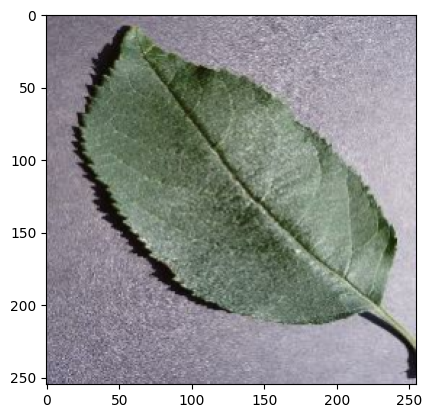

In [5]:
for image_batch,label in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    print(image_batch[0].shape)

In [6]:
#data partitioning
def get_dataset_partions_df(ds,train_split=0.8,test_split=0.1,val_split=0.1,shuffle=True,shuffle_size=1000):
    
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(ds_size*train_split)
    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)
    test_ds=ds.skip(train_size).take(val_size)

    val_ds=ds.skip(train_size).skip(val_size)
    return train_ds,test_ds,val_ds

In [7]:
train_ds,test_ds,val_ds=get_dataset_partions_df(dataset)

In [43]:
len(test_ds)*12,len(val_ds)*12,len(train_ds)*12

(456, 480, 3708)

In [9]:
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
train_ds_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [10]:
resize_and_rescale = Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)  # Normalizes pixel values to [0, 1]
])
data_agumentation=tf.keras.Sequential([
layers.RandomFlip('horizantal_and_vertical'),
layers.RandomRotation(0.2)
])

In [14]:
CHANNEL=3
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNEL)
model=models.Sequential([
    resize_and_rescale,
    data_agumentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
]
)


c:\Users\n shiva kumar\OneDrive\Desktop\image_classification\imgvenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.build(input_shape=input_shape)

In [31]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (12, 255, 255, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (12, 255, 255, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (12, 253, 253, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (12, 126, 126, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (12, 124, 124, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (12, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (12, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (12, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (12, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (12, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (12, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (12, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (12, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (12, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (12, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (12, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (12, 4)                │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,812 (718.02 KB)

 Trainable params: 183,812 (718.02 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [44]:
history= model.fit(
train_ds,
epochs=EPOCH,
batch_size=BATCH_SIZE,
verbose=1,
validation_data=val_ds
)

Epoch 1/7


309/309 ━━━━━━━━━━━━━━━━━━━━ 121s 363ms/step - accuracy: 0.8304 - loss: 0.4656 - val_accuracy: 0.8104 - val_loss: 0.5280
Epoch 2/7
309/309 ━━━━━━━━━━━━━━━━━━━━ 139s 428ms/step - accuracy: 0.8689 - loss: 0.3669 - val_accuracy: 0.8372 - val_loss: 0.4532
Epoch 3/7
309/309 ━━━━━━━━━━━━━━━━━━━━ 126s 386ms/step - accuracy: 0.8957 - loss: 0.2831 - val_accuracy: 0.8958 - val_loss: 0.3905
Epoch 4/7
309/309 ━━━━━━━━━━━━━━━━━━━━ 124s 381ms/step - accuracy: 0.9185 - loss: 0.2428 - val_accuracy: 0.9333 - val_loss: 0.1951
Epoch 5/7
309/309 ━━━━━━━━━━━━━━━━━━━━ 119s 368ms/step - accuracy: 0.9102 - loss: 0.2722 - val_accuracy: 0.9104 - val_loss: 0.1958
Epoch 6/7
309/309 ━━━━━━━━━━━━━━━━━━━━ 117s 360ms/step - accuracy: 0.9264 - loss: 0.2169 - val_accuracy: 0.9374 - val_loss: 0.1642
Epoch 7/7
309/309 ━━━━━━━━━━━━━━━━━━━━ 119s 369ms/step - accuracy: 0.9310 - loss: 0.1869 - val_accuracy: 0.9229 - val_loss: 0.2249


In [45]:
pred=model.predict(test_ds)

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step


In [46]:
pred

array([[9.52786446e-01, 3.02886406e-06, 1.15223600e-08, 4.72105406e-02],
       [2.12595842e-04, 9.99787390e-01, 2.91439177e-15, 3.43112916e-09],
       [2.68250890e-02, 7.31377676e-02, 1.14018556e-04, 8.99923086e-01],
       ...,
       [9.99132454e-01, 1.45740678e-05, 2.30668054e-04, 6.22272142e-04],
       [3.67363274e-01, 3.82226370e-02, 5.88437974e-01, 5.97610464e-03],
       [3.55247259e-01, 9.92412120e-03, 3.21422750e-03, 6.31614387e-01]],
      dtype=float32)

In [47]:
history.params

{'verbose': 1, 'epochs': 7, 'steps': 309}

['accuracy', 'loss', 'val_accuracy', 'val_loss']

In [60]:
train_history=history.history
train_history['accuracy']
train_history

{'accuracy': [0.8473159074783325,
  0.8842729926109314,
  0.8988400101661682,
  0.9099001884460449,
  0.9120582938194275,
  0.9233881831169128,
  0.9260857701301575],
 'loss': [0.41312336921691895,
  0.32491880655288696,
  0.27037060260772705,
  0.25407761335372925,
  0.2607387900352478,
  0.21400485932826996,
  0.20146867632865906],
 'val_accuracy': [0.8104166388511658,
  0.8371607661247253,
  0.8958333134651184,
  0.9333333373069763,
  0.9104166626930237,
  0.9373695254325867,
  0.9229166507720947],
 'val_loss': [0.527980387210846,
  0.4532438814640045,
  0.3905430734157562,
  0.19507379829883575,
  0.19575516879558563,
  0.16415007412433624,
  0.22488288581371307]}

In [69]:
x=range(EPOCH)
train_history['val_accuracy']

[0.8104166388511658,
 0.8371607661247253,
 0.8958333134651184,
 0.9333333373069763,
 0.9104166626930237,
 0.9373695254325867,
 0.9229166507720947]

Text(0.5, 1.0, 'validation loss')

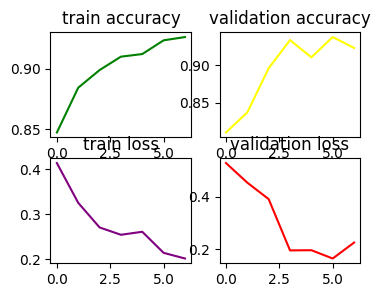

In [92]:
import seaborn as sns
fig, axs=plt.subplots(2,2,figsize=(4,3))
axs[0,0].plot(x,train_history['accuracy'],color='green')
axs[0,0].set_title('train accuracy')
axs[0,1].plot(x,train_history['val_accuracy'],color='yellow')
axs[0,1].set_title('validation accuracy')
axs[1,0].plot(x,train_history['loss'],color='purple')
axs[1,0].set_title('train loss')
axs[1,1].plot(x,train_history['val_loss'],color='red')
axs[1,1].set_title('validation loss')


In [25]:
EPOCH=1
train_pred=train_history['accuracy'][EPOCH]
val_pred=train_history['val_accuracy'][EPOCH]
train_pred,val_pred

(0.7488535046577454, 0.824999988079071)

In [26]:
predict_list=[]
actual_list=[]
for image_batch, label_batch in test_ds.take(38):
    first_img = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    # plt.imshow(first_img)
    # plt.title(f'Actual label: {class_names[first_label]}')
    pred=model.predict(image_batch)
    predict_list.extend([int(np.argmax(i)) for i in pred])
    actual_list.extend(label_batch)
print(predict_list)
print(actual_list)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(predict_list,actual_list)

0.8026315789473685